In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


Features for clustering: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Shape: (200, 3)
Clusters found: [2 0 1]
Cluster centers (scaled): [[ 0.82935381 -0.00348296 -0.65438593]
 [-0.43033758  1.02223317  1.15593564]
 [-0.98371627 -0.65995549  0.24488394]]
Silhouette Score: 0.3579234303882264


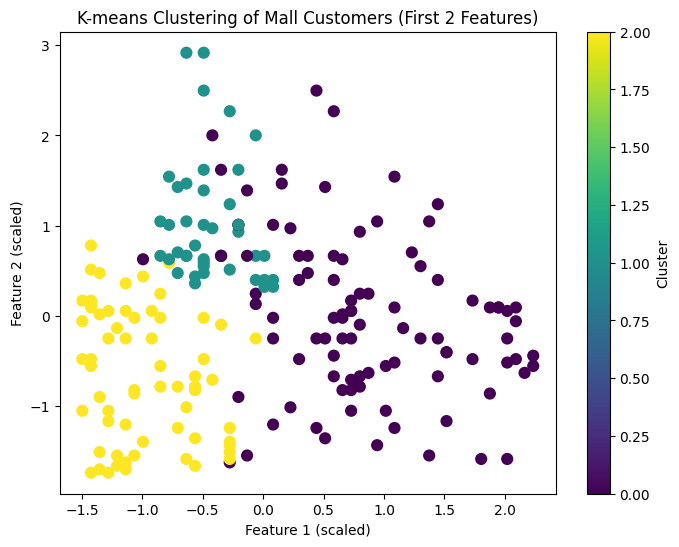

In [4]:
# Load dataset
df=pd.read_csv('C:\\Users\\hp\\Documents\\Python\\Mall_Customers.csv')
x_mall=df.drop(columns=['CustomerID','Genre'])

print("Features for clustering:", x_mall.columns.tolist())
print("Shape:", x_mall.shape)

# Standardize the features
x_mall_scaled = StandardScaler().fit_transform(x_mall)

# Apply K-means with 3 clusters
kmeans_mall = KMeans(n_clusters=3, random_state=42)
kmeans_mall.fit(x_mall_scaled)

df['cluster'] = kmeans_mall.labels_
print("Clusters found:", df['cluster'].unique())
print("Cluster centers (scaled):", kmeans_mall.cluster_centers_)

# Silhouette Score
sil_score_mall = silhouette_score(x_mall_scaled, kmeans_mall.labels_)
print("Silhouette Score:", sil_score_mall)

# Visualize clusters (using first 2 features)
plt.figure(figsize=(8, 6))
plt.scatter(x_mall_scaled[:, 0], x_mall_scaled[:, 1], c=kmeans_mall.labels_, s=60, cmap='viridis')
plt.title("K-means Clustering of Mall Customers (First 2 Features)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.colorbar(label='Cluster')
plt.show()


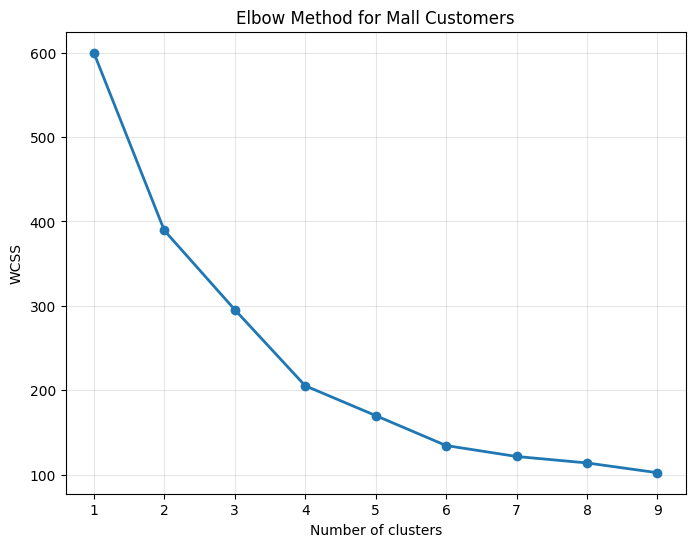

In [5]:
# Elbow method for Mall Customers dataset
wcss_mall = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(x_mall_scaled)
    wcss_mall.append(km.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), wcss_mall, marker='o', linewidth=2)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Mall Customers")
plt.grid(True, alpha=0.3)
plt.show()